# Model Interpretability


1.Name: Viral Jangale

2.NUID: 002654463

# Abstract


The objective was to build a classifier model, a regression model, and a model utilizing H20 AutoML to find the best model for the selected dataset. These models should all undergo SHAP Analysis after being built. This produces SHAP values that are then compared to those from other model interpretability models. The widespread consensus is that because so many variables are involved, it is impossible to anticipate the price of a home with any degree of accuracy. Price is the dependent variable in this dataset, whereas the others are independent variables. Selecting the key variables that influence house prices should come first. Then, using linear regression and random forest, a housing price forecast model should be created (classifier tree based model). To test the models, that ought to be done with the Melbourne housing dataset. The results of the data analysis and testing indicate that, while the algorithm can still be improved using more sophisticated machine learning techniques, the linear regression model and random forest classifier can predict and assess the housing price to some extent.

#Dataset


This is a  static snapshot of a dataset created by Tony Pino.

It was taken from publicly accessible results that Domain.com.au posts each week. He did a good job of cleaning it, and you now have to work your data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.<br>
Notes on Specific Variables
Rooms: Number of rooms<br>
Price: Price in dollars<br>
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.<br>
Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.<br>
SellerG: Real Estate Agent<br>
Date: Date sold<br>
Distance: Distance from CBD<br>
Regionname: General Region (West, North West, North, North east …etc)<br>
Propertycount: Number of properties that exist in the suburb.<br>
Bedroom2 : Scraped # of Bedrooms (from different source)<br>
Bathroom: Number of Bathrooms<br>
Car: Number of carspots<br>
Landsize: Land Size<br>
BuildingArea: Building Size<br>
CouncilArea: Governing council for the area

# Installing and Importing required libraries

In [99]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [101]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Reading and Analyzing Dataset

In [102]:
data = pd.read_csv("https://github.com/Viral-28/Datascience/raw/main/datasciencemelbourne.csv")

In [103]:
data.head()

Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0       0     2790      1     0    839       1       18    41        12   
1       0     4520      2     0   1118       3       18    42        12   
2       0     4882      3     0   1174       4      112    43        12   
3       0     1027      2     0   1291       1      112    46        12   
4       0     6101      1     0   1193       1      112    50        12   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0        50  ...         0    0       110            85         23   
1        50  ...         1    0        88           224         23   
2        50  ...         0    2        74           212        130   
3        50  ...         1    0       198           313         32   
4        50  ...         0    2       209           143         17   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0           29       1712        1839           2            135  
1           29       1690        1854           2            135  
2           29       1722        1851           2            135  
3           29       1788        1932           2            135  
4           29       1737        1869           2            135  

[5 rows x 21 columns]

In [104]:
data.shape

(6196, 21)

In [105]:
#taking the basic information of all the columns in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6196 entries, 0 to 6195
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Suburb         6196 non-null   int64
 1   Address        6196 non-null   int64
 2   Rooms          6196 non-null   int64
 3   Type           6196 non-null   int64
 4   Price          6196 non-null   int64
 5   Method         6196 non-null   int64
 6   SellerG        6196 non-null   int64
 7   Date           6196 non-null   int64
 8   Distance       6196 non-null   int64
 9   Postcode       6196 non-null   int64
 10  Bedroom2       6196 non-null   int64
 11  Bathroom       6196 non-null   int64
 12  Car            6196 non-null   int64
 13  Landsize       6196 non-null   int64
 14  BuildingArea   6196 non-null   int64
 15  YearBuilt      6196 non-null   int64
 16  CouncilArea    6196 non-null   int64
 17  Lattitude      6196 non-null   int64
 18  Longtitude     6196 non-null   int64
 19  Region

In [106]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [107]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [108]:
#Calculating VIF 
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

          feature        VIF
0          Suburb   3.971947
1         Address   4.008772
2           Rooms  53.756730
3            Type   3.095120
4          Method   2.585650
5         SellerG   3.769657
6            Date   4.125136
7        Distance   7.626206
8        Postcode   8.192933
9        Bedroom2  94.086678
10       Bathroom   3.464902
11            Car   5.312394
12       Landsize   3.924441
13   BuildingArea  13.088665
14      YearBuilt  10.525404
15    CouncilArea   3.786261
16      Lattitude   7.911781
17     Longtitude  10.823703
18     Regionname   6.559713
19  Propertycount   8.062638


In [109]:
cols= ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']
model = sm.OLS(y_train,sm.add_constant(X_train[cols])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     936.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:19:11   Log-Likelihood:                -32863.
No. Observations:                4956   AIC:                         6.577e+04
Df Residuals:                    4935   BIC:                         6.590e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           771.1710     27.940     27.601

In [110]:
#Dropping columns causing multicollinearity or those who are unimportant for prediction of Price
data=data.drop(['Address','Bedroom2','Date'],axis=1)

Text(0.5, 1.0, 'Variable Correlation')

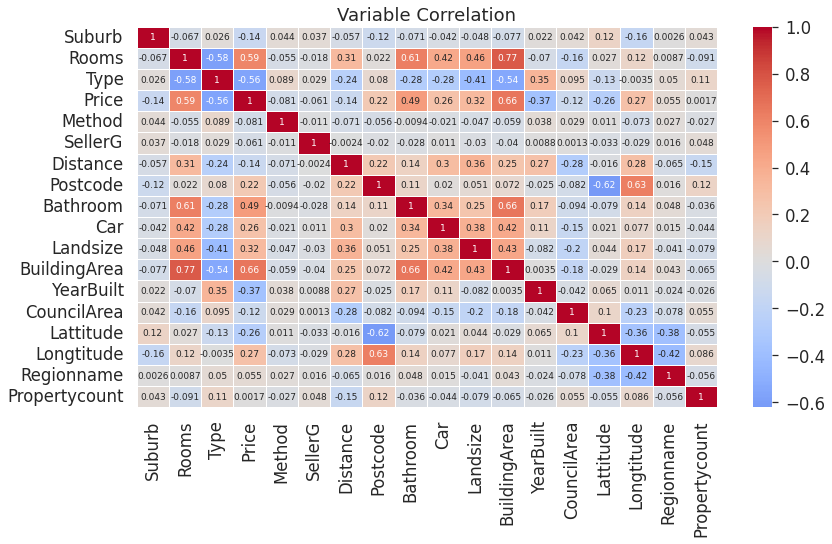

In [111]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Performing Linear Regression

In [112]:
#Computing Linear Regression model for Melbourne dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred))) 

In [113]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
cols1= ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname','Propertycount']

In [115]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :33658.618456670054
Linear Regression r2_score :0.7914411252916436
Test set
Linear Regression Mean Squared error :33481.48528671178
Linear Regression r2_score :0.795652256436227


# SHAP Analysis on Linear Regression model

The SHAP values for each feature show how the predicted model prediction changes when that feature is taken into consideration. The SHAP value for each feature illustrates how that factor contributes to explaining the discrepancy between the average model forecast and the instance's actual prediction. The core of the Shapley value is to assess each coalition member's individual contribution to the ultimate result while maintaining that the aggregate of those contributions equals the result. The contribution of input features to specific predictions can be measured using SHAP values in model explanation.

In [116]:
%%capture
!pip install shap
import shap 

In [117]:
import shap
shap.initjs()

In [118]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional") 
shap_values = explainer.shap_values(X) #Saving SHAP values

In [119]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [120]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

In [121]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

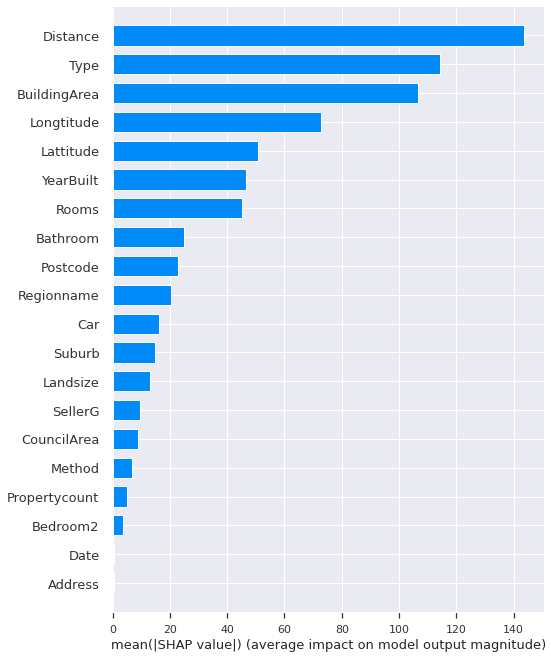

In [122]:
shap.summary_plot(shap_values, X, plot_type="bar")

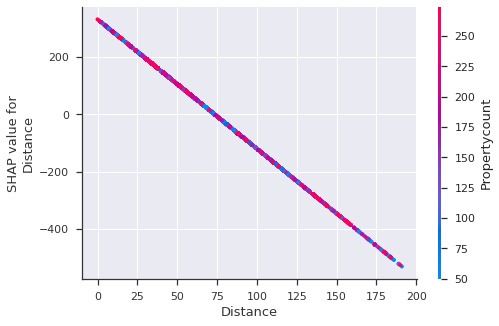

In [123]:
shap.dependence_plot("Distance", shap_values, X_train)

In [124]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Price'],axis=1)
y=data['Price']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

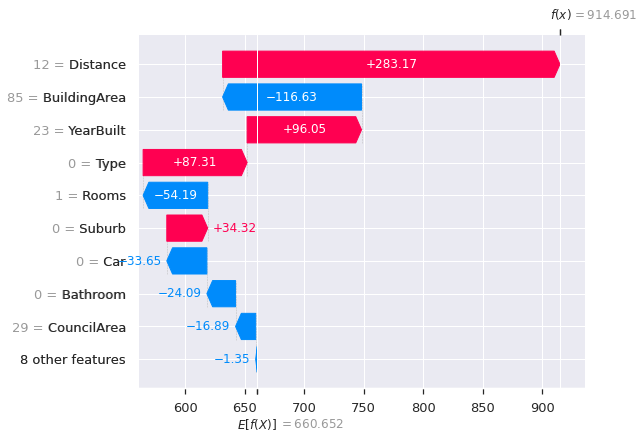

In [125]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that distance, building area and type are the important features for this regressor model. These are the major features in determining the Price of the house.

# Performing Random Forest 

In [126]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train) 

RandomForestRegressor()

In [127]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :2562.09079139312
ramdomforest r2_score :0.9841245185674666
Tesst set
ramdomforest Mean Squared error :19387.512389814114
ramdomforest r2_score :0.8816720830558381


# SHAP Analysis on Random Forest Model


In [128]:
%%capture
!pip install shap
import shap 

In [129]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X) 

In [130]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [131]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

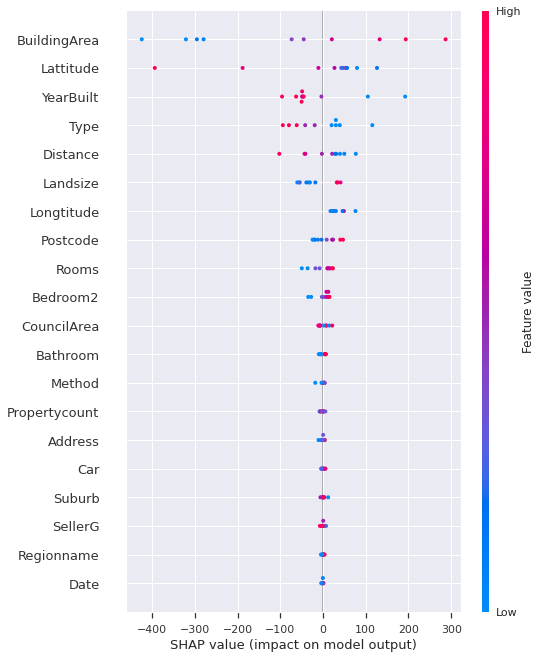

In [132]:
shap.initjs()
shap.summary_plot(shap_values, X) 

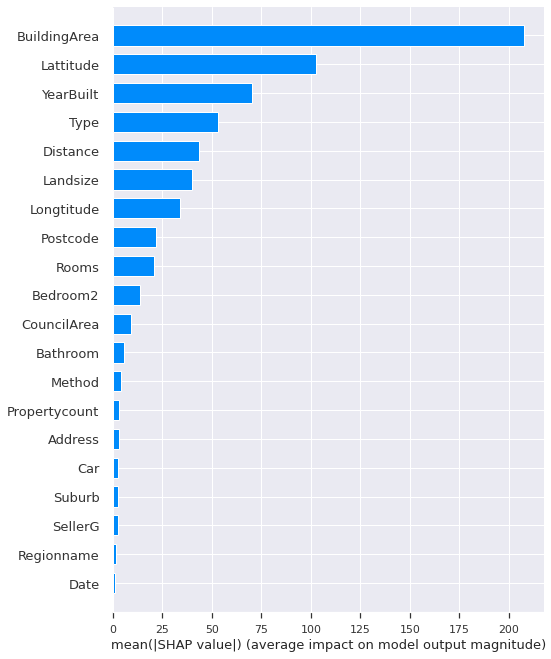

In [133]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

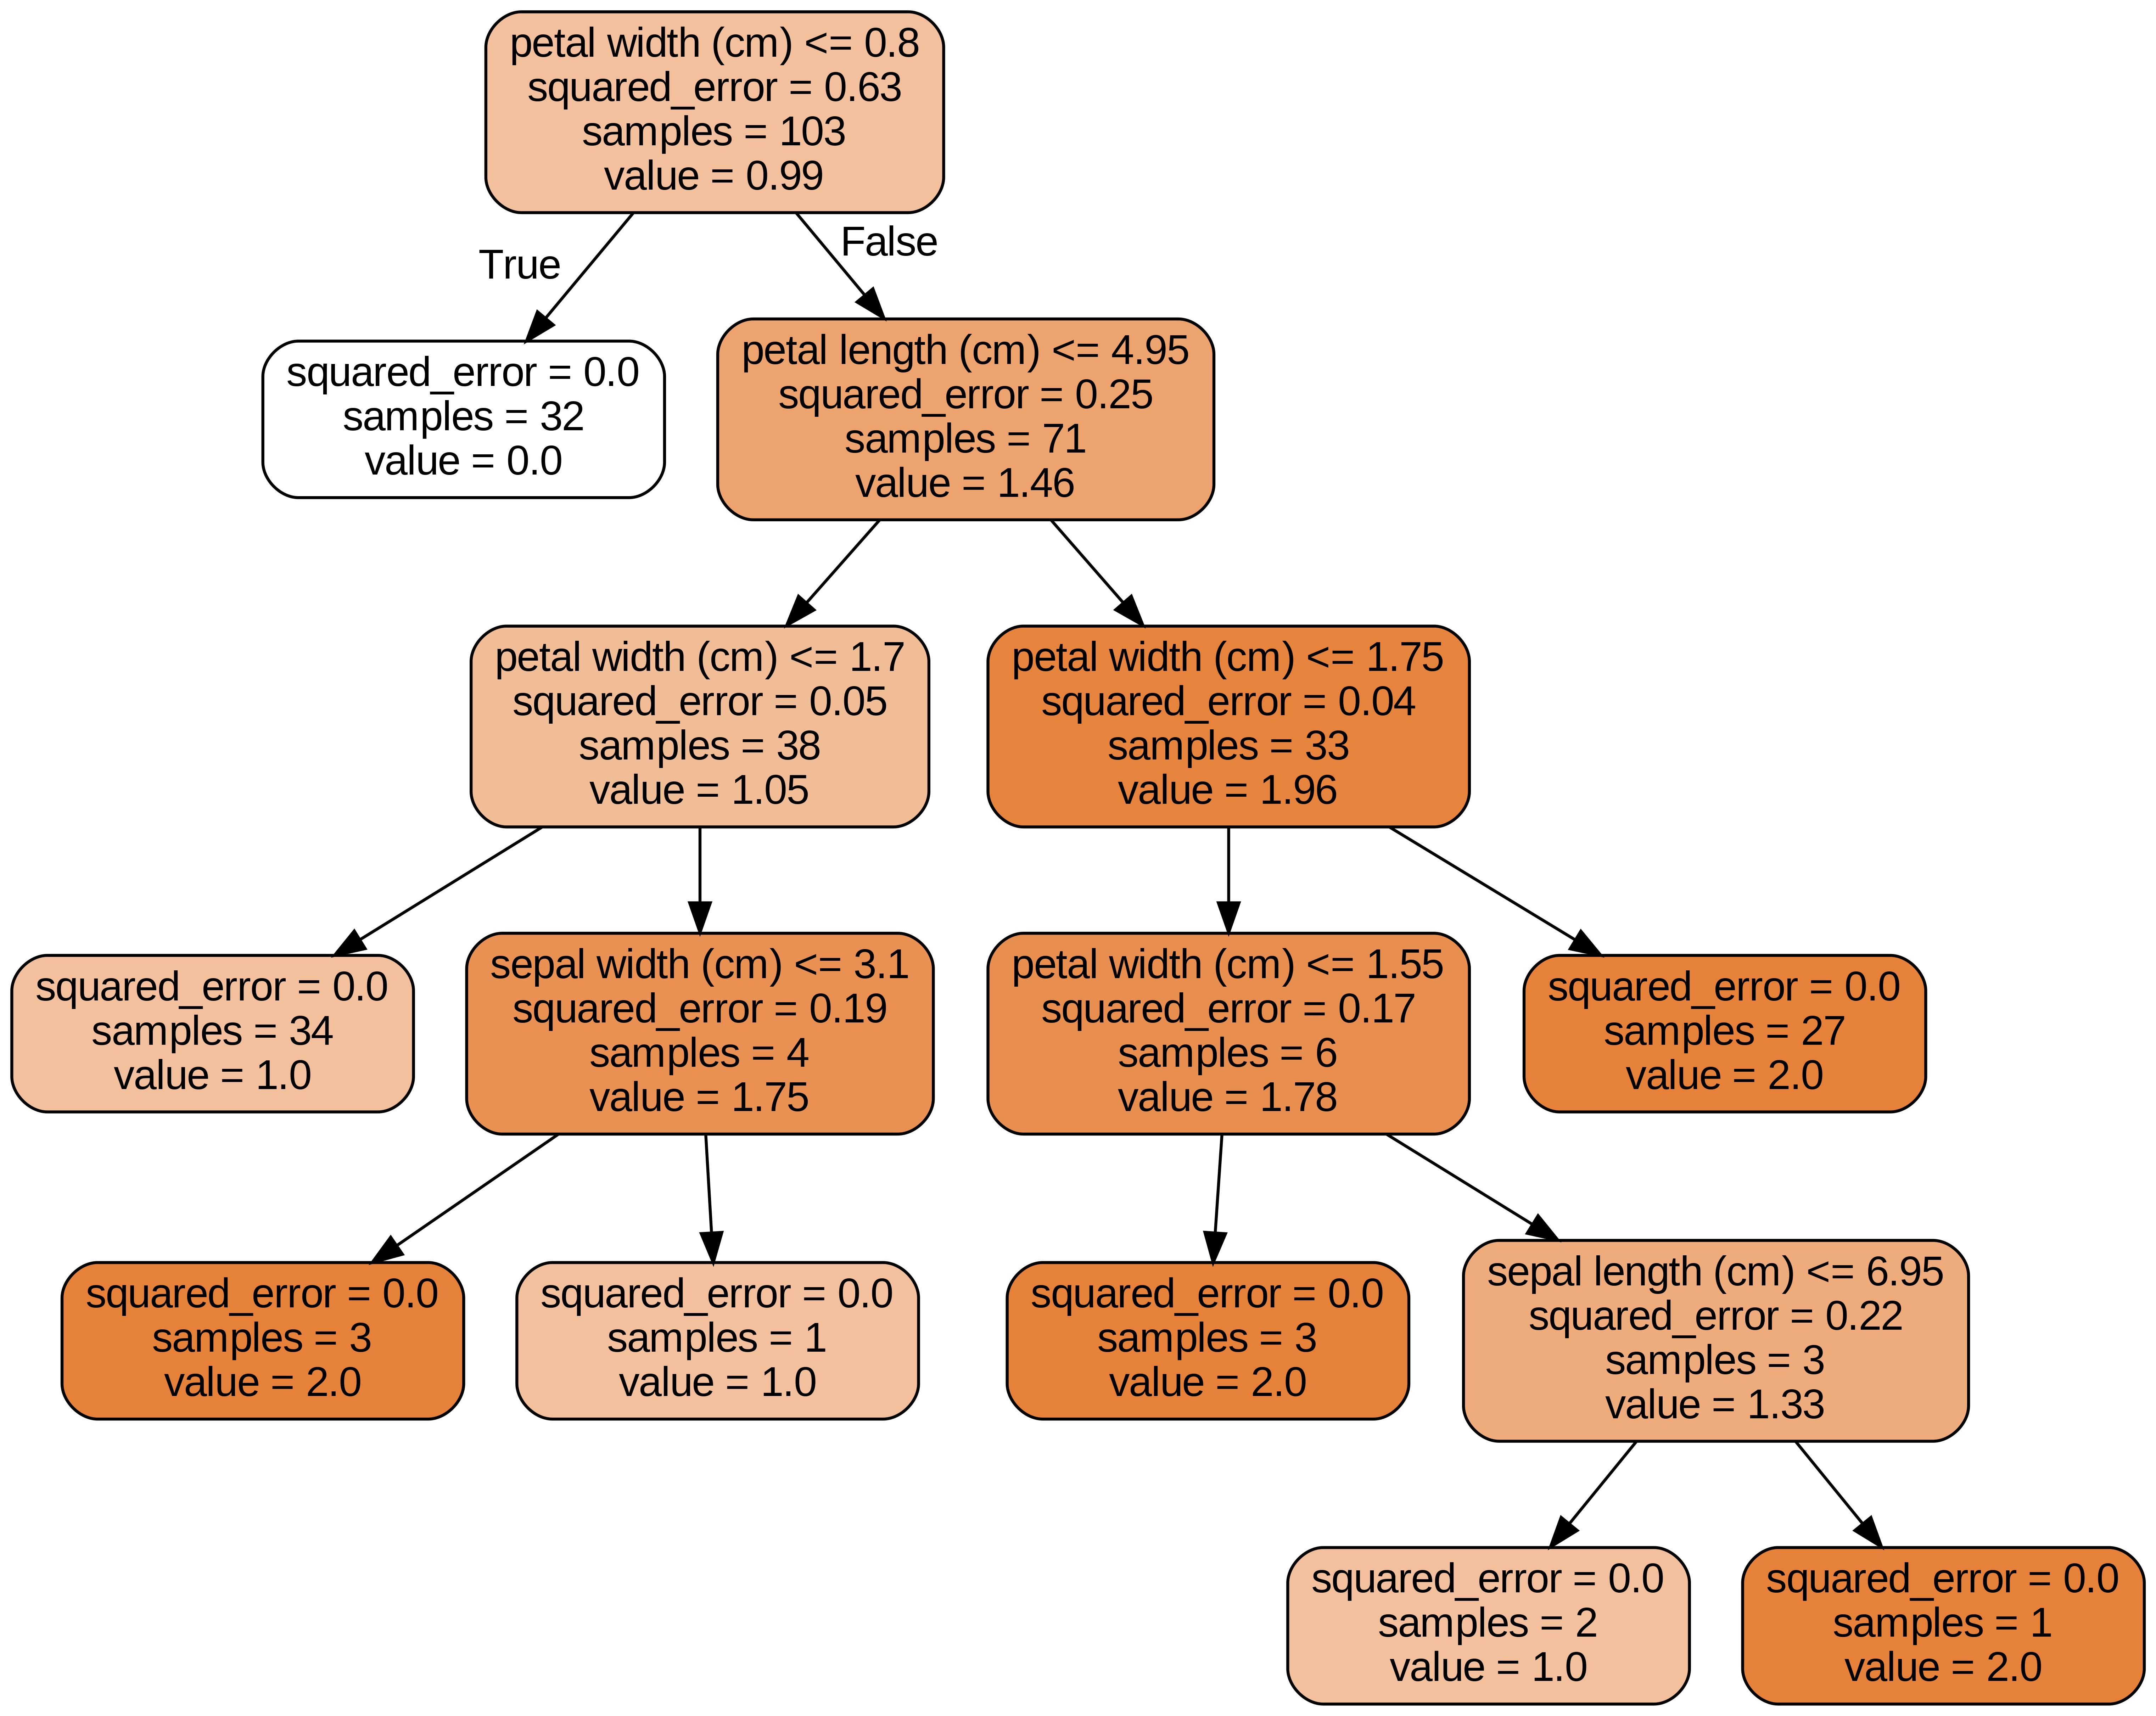

In [135]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Price' are BuildingArea, Latitude and YearBuilt. BuildingArea is the common feature which is important for both Random Forest and Linear Regression Model. BuildingArea has the highest value of feature importance and is placed first on the scale.

# Using AutoML to identify best model

In [136]:
#importing all the necessary libraries

import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import scipy

In [137]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [138]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [139]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:47107..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps2tbkkh1
  JVM stdout: /tmp/tmps2tbkkh1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps2tbkkh1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:47107
Connecting to H2O server at http://127.0.0.1:47107 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_ms1b8f
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:47107
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [140]:
# Create a 80/20 train/test split
url = "https://github.com/Viral-28/Datascience/raw/main/datasciencemelbourne.csv"
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Suburb    Address    Rooms    Type    Price    Method    SellerG    Date    Distance    Postcode    Bedroom2    Bathroom    Car    Landsize    BuildingArea    YearBuilt    CouncilArea    Lattitude    Longtitude    Regionname    Propertycount
--------  ---------  -------  ------  -------  --------  ---------  ------  ----------  ----------  ----------  ----------  -----  ----------  --------------  -----------  -------------  -----------  ------------  ------------  ---------------
       0       2790        1       0      839         1         18      41          12          50           2           0      0         110              85           23             29         1712          1839             2              135
       0       4520        2       0     1118         3         18      42          12          50           3           1      0          88             224           23             29         1690          1854             2              135
       0       4882        3       0     1174         4        112      43          12          50           3           0      2          74             212          130             29         1722          1851             2              135
       0       1027        2       0     1291         1        112      46          12          50           4           1      0         198             313           32             29         1788          1932             2              135
       0       6101        1       0     1193         1        112      50          12          50           2           0      2         209             143           17             29         1737          1869             2              135
       0        535        1       0      878         1         18      50          12          50           3           0      2         174              78           23             29         1808          1926             2              135
       0       4170        2       0     1050         4        112       7          12          50           3           1      2         168             287          121             29         1702          1885             2              135
       0       1021        1       2      544         1         18       7          12          50           2           1      1           0             111          125             29         1713          1886             2              135
       0       1533        1       0     1027         1         80      12          12          50           2           0      2         191             117           17             29         1695          1904             2              135
       0       4244        2       0      948         1         80      14          12          50           3           1      1          67             149           10             29         1744          1832             2              135
[10 rows x 21 columns]

In [141]:
# Set the features and target
X=df.columns
print(X)

y ='Price'
X.remove(y) 
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [142]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20230325_192126


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       17/36
# GBM base models (used / total)           6/13
# XGBoost base models (used / total)       11/17
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/3
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4114.054289634736
RMSE: 64.14089405079054
MAE: 47.64404752573557
RMSLE: NaN
Mean Residual Deviance: 4114.054289634736
R^2: 0.9745786109652357
Null degrees of freedom: 4956
Residual degrees of freedom: 4939
Null deviance: 802212935.1716768
Residual deviance: 20393367.113719385
AIC: 55358.324886932096

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 15190.736631528935
RMSE: 123.25070641391446
MAE: 90.98580511260569
RMSLE: NaN
Mean Residual Deviance: 15190.736631528935
R^2: 0.9061340472322672
Null degrees of freedom: 4956
Residual degrees of freedom: 4942
Null deviance: 802253278.5723666
Residual deviance: 75300481.48248893
AIC: 61827.53909596194

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     90.9946      2.40087      91.9301       87.9525       89.2191       93.9937       91.8777
mean_residual_deviance  15182.4      672.165      15480.2       14674.9       14830.7       16231.1       14695
mse                     15182.4      672.165      15480.2       14674.9       14830.7       16231.1       14695
null_deviance           1.60451e+08  5.51578e+06  1.56706e+08   1.56415e+08   1.62491e+08   1.69268e+08   1.57373e+08
r2                      0.906123     0.00569543   0.898339      0.905053      0.910095      0.904074      0.913054
residual_deviance       1.50601e+07  1.03394e+06  1.59291e+07   1.4851e+07    1.46083e+07   1.62311e+07   1.3681e+07
rmse                    123.193      2.70658      124.42        121.14        121.781       127.401       121.223
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [143]:
print(aml.leaderboard)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20230325_192126     123.251  15190.7  90.9858      nan                   15190.7
StackedEnsemble_AllModels_2_AutoML_1_20230325_192126     124.423  15481.2  91.9054      nan                   15481.2
StackedEnsemble_AllModels_1_AutoML_1_20230325_192126     125.079  15644.8  92.0094      nan                   15644.8
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_192126  126.145  15912.7  93.4379      nan                   15912.7
StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_192126  126.445  15988.3  93.386       nan                   15988.3
GBM_2_AutoML_1_20230325_192126                           128.109  16411.9  95.2488      nan                   16411.9
GBM_grid_1_AutoML_1_20230325_192126_model_4              128.278  16455.2  95.6976      nan                   16455.2
StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_192126 

In [144]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20230325_192126': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20230325_192126': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20230325_192126': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_192126': 3,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_192126': 4,
 'GBM_2_AutoML_1_20230325_192126': 5,
 'GLM_1_AutoML_1_20230325_192126': 40}

In [145]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

5


In [146]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


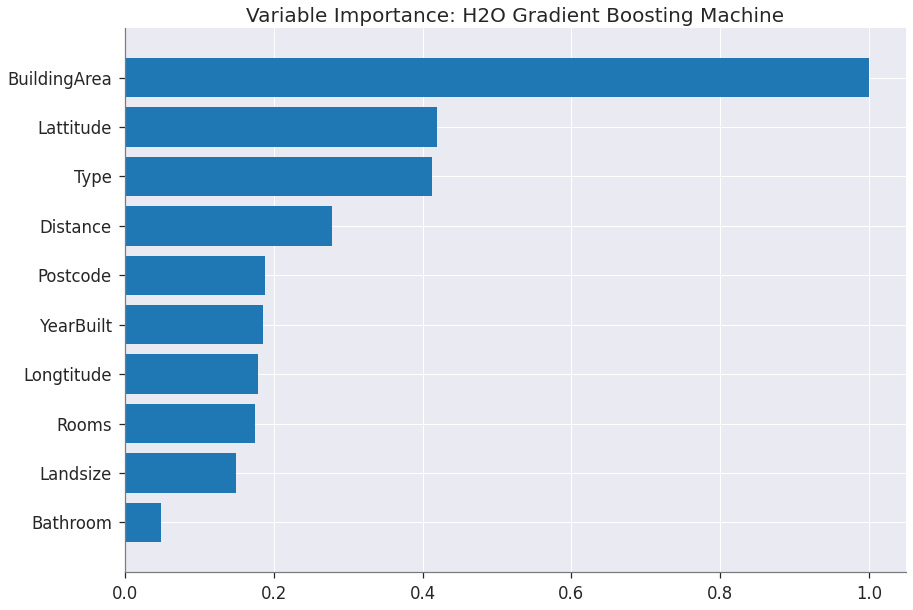

<Figure size 576x396 with 0 Axes>

In [147]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

40
glm


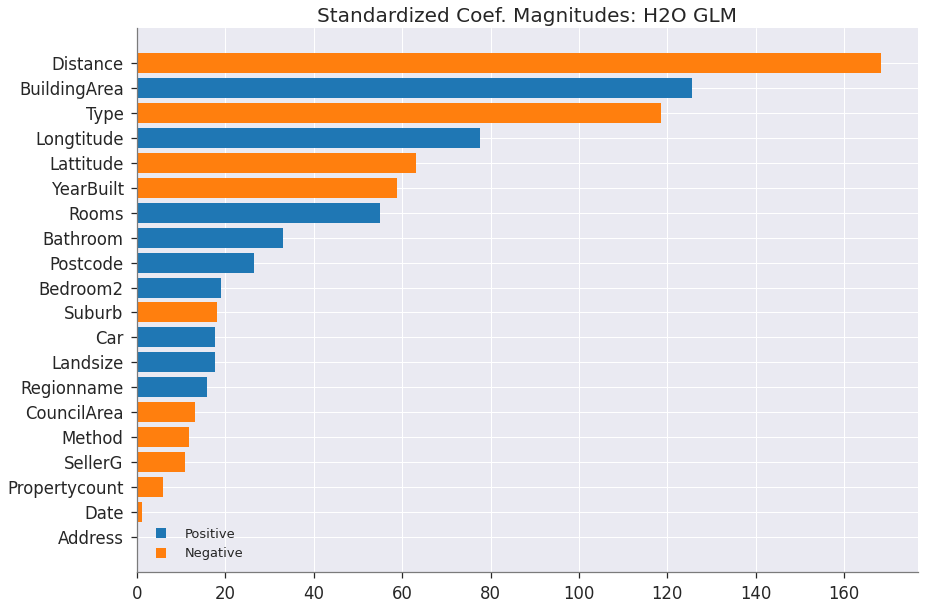

In [148]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

# SHAP Analysis on AutoML model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse      mse       mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  -------  --------  -------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_3_AutoML_1_20230325_192126     121.785  14831.7   89.33        nan                   14831.7                1012                   0.173686  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230325_192126     123.26   15193     90.6058      nan                   15193                   792                   0.122694  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230325_192126     123.64   15286.9   90.6524      nan                   15286.9                 559                   0.092685  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_192126  125.353  15713.5   92.3759      nan                   15713.5                 593                   0.035672  StackedEnsemble
GBM_4_AutoML_1_20230325_192126                           125.423  15730.9   93.4437      nan                   15730.9                1032                   0.025492  GBM
GBM_3_AutoML_1_20230325_192126                           125.651  15788.1   92.533       nan                   15788.1                 950                   0.016268  GBM
GBM_grid_1_AutoML_1_20230325_192126_model_4              126.336  15960.8   93.5092      nan                   15960.8                1261                   0.0274    GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_192126  126.745  16064.4   92.7789      nan                   16064.4                 412                   0.086489  StackedEnsemble
GBM_5_AutoML_1_20230325_192126                           127.193  16178.1   94.7432      nan                   16178.1                 893                   0.024665  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_192126  127.347  16217.4   93.7775      nan                   16217.4                 618                   0.027047  StackedEnsemble
GBM_2_AutoML_1_20230325_192126                           128.226  16441.9   94.1938      nan                   16441.9                 804                   0.014742  GBM
GBM_grid_1_AutoML_1_20230325_192126_model_5              128.619  16542.9   94.8332      nan                   16542.9                1904                   0.02598   GBM
GBM_grid_1_AutoML_1_20230325_192126_model_3              129.199  16692.5   95.2223      nan                   16692.5                 600                   0.021608  GBM
GBM_1_AutoML_1_20230325_192126                           129.383  16740     95.7829      nan                   16740                  2614                   0.028916  GBM
GBM_grid_1_AutoML_1_20230325_192126_model_2              129.656  16810.6   96.4484      nan                   16810.6                 821                   0.020056  GBM
XGBoost_3_AutoML_1_20230325_192126                       130.646  17068.3   98.9366      nan                   17068.3                 441                   0.006131  XGBoost
GBM_grid_1_AutoML_1_20230325_192126_model_6              131.538  17302.3   97.5002      nan                   17302.3                 593                   0.023722  GBM
XGBoost_grid_1_AutoML_1_20230325_192126_model_7          131.974  17417    100.268       nan                   17417                   555                   0.007686  XGBoost
XGBoost_grid_1_AutoML_1_20230325_192126_model_9          132.293  17501.5   99.5846      nan                   17501.5                 736                   0.00806   XGBoost
GBM_grid_1_AutoML_1_20230325_192126_model_1              132.421  17535.3   98.3887      nan                   17535.3                1093                   0.029531  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

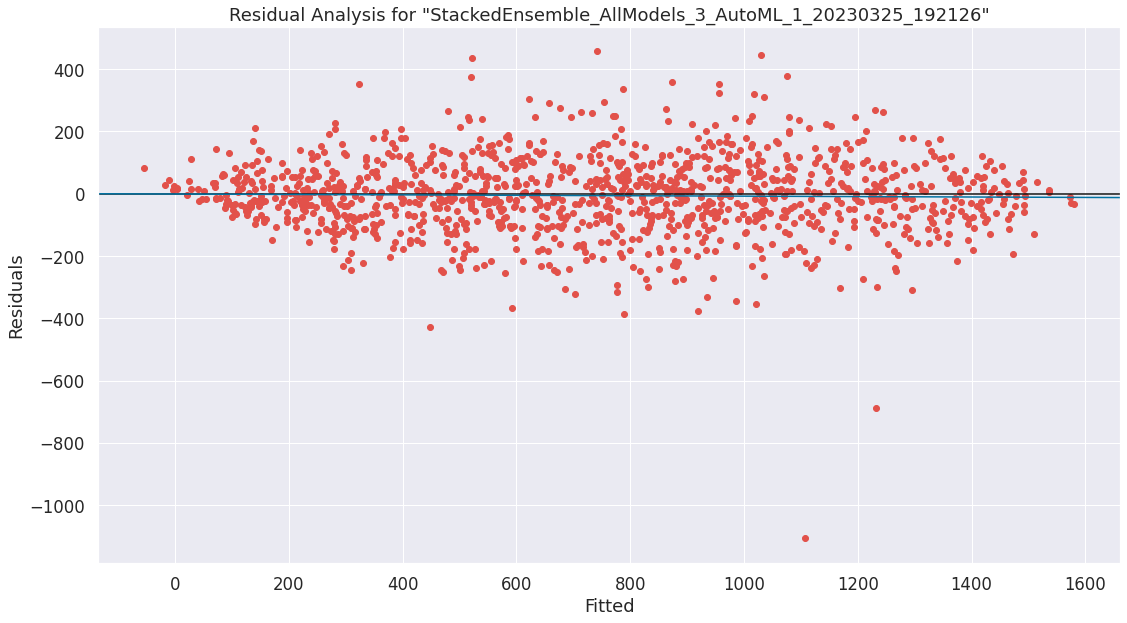

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

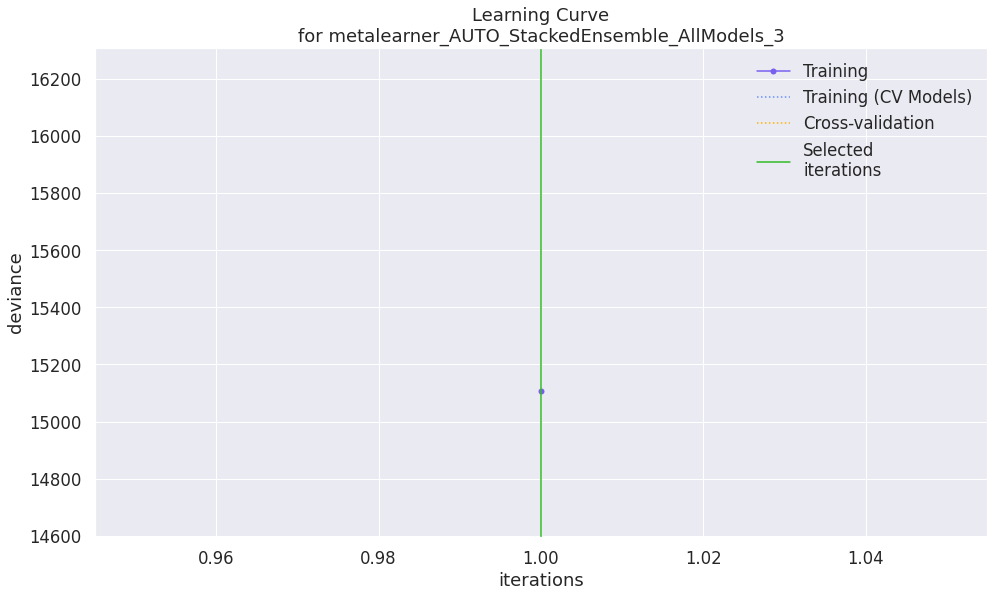

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

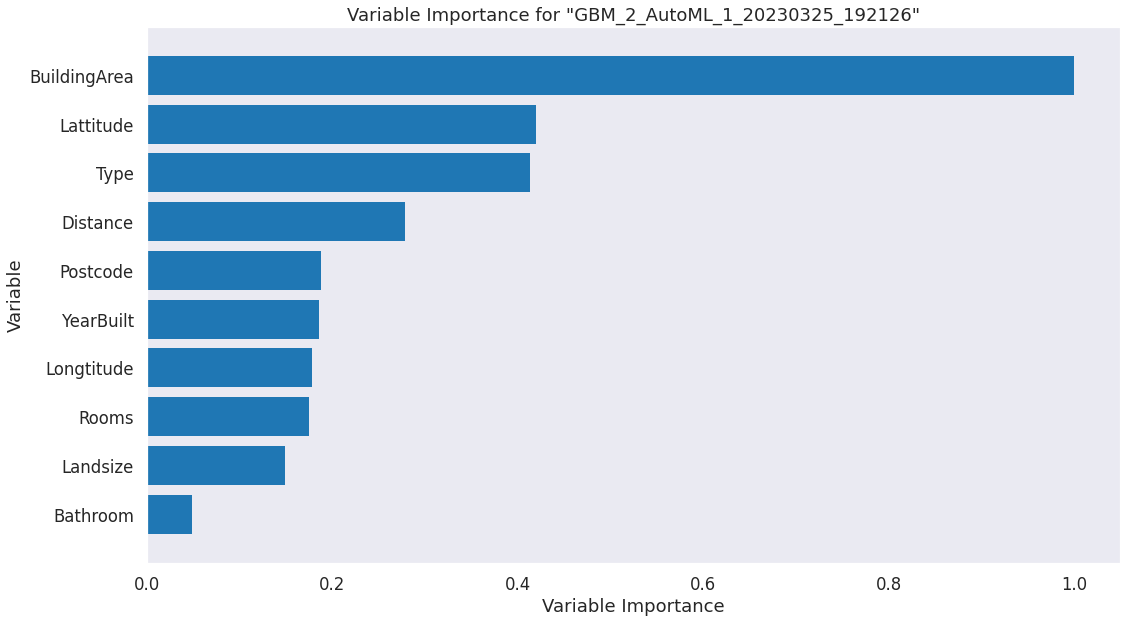

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

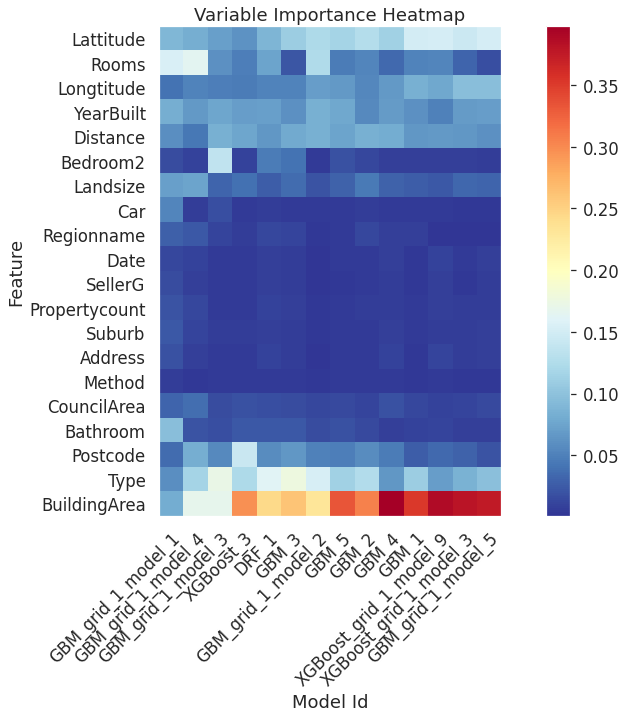

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

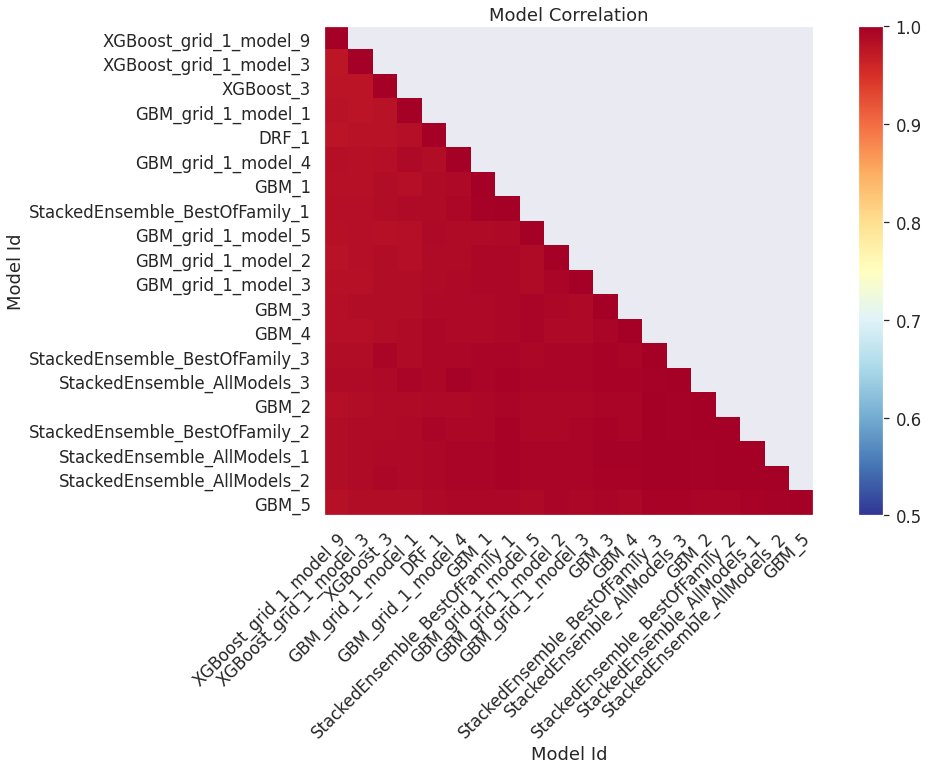

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

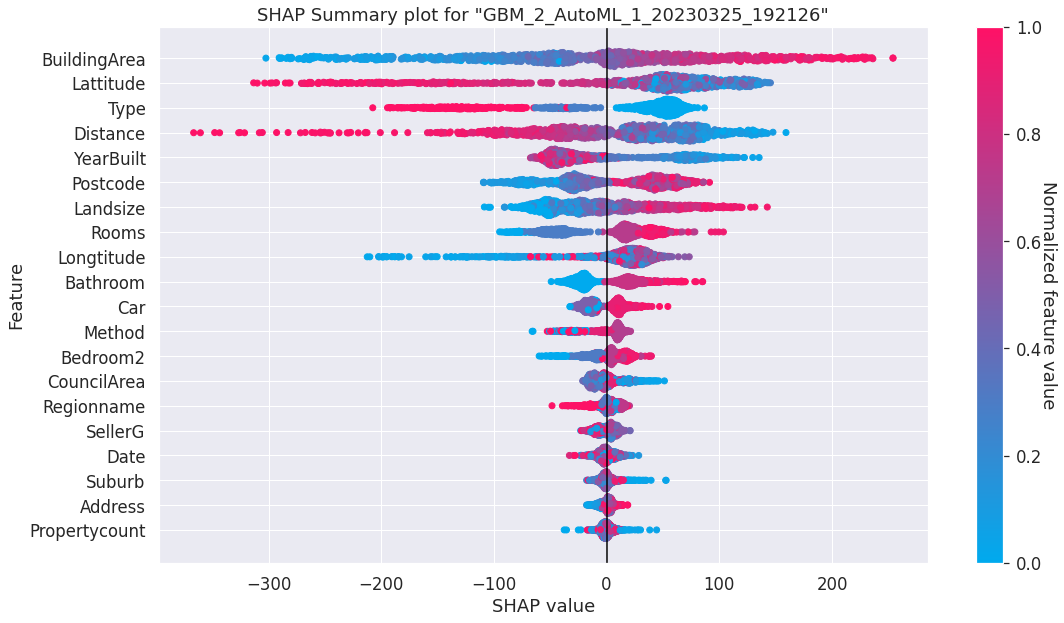

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

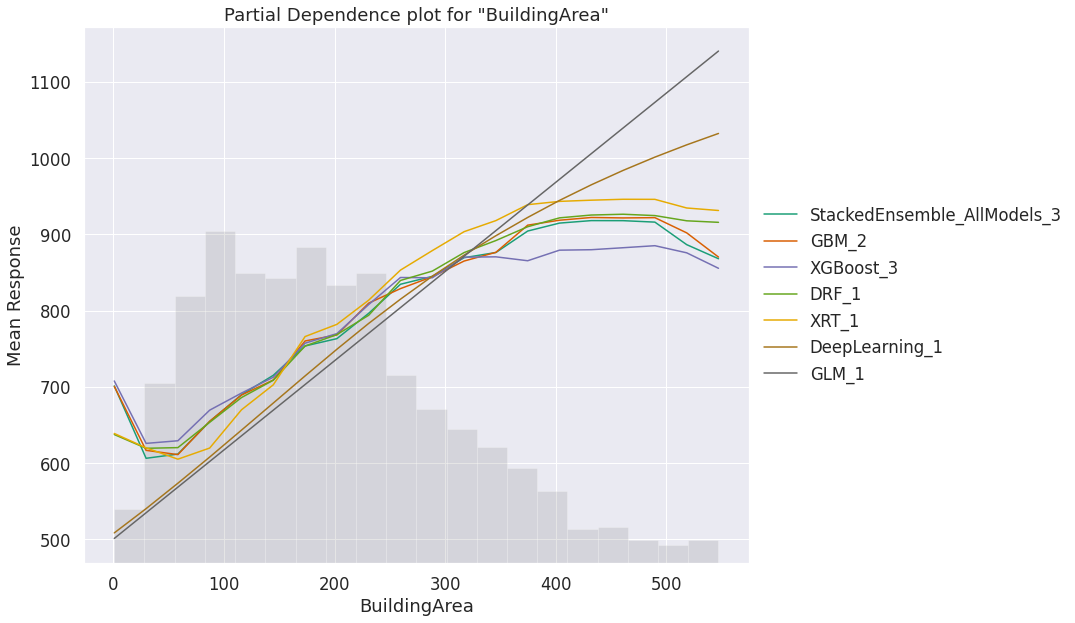

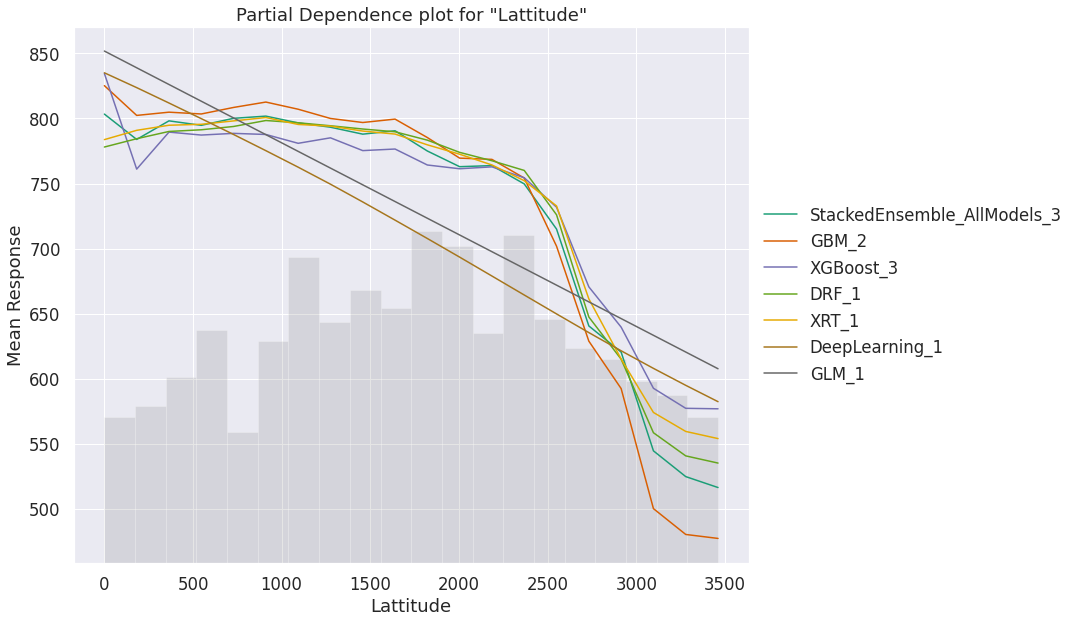

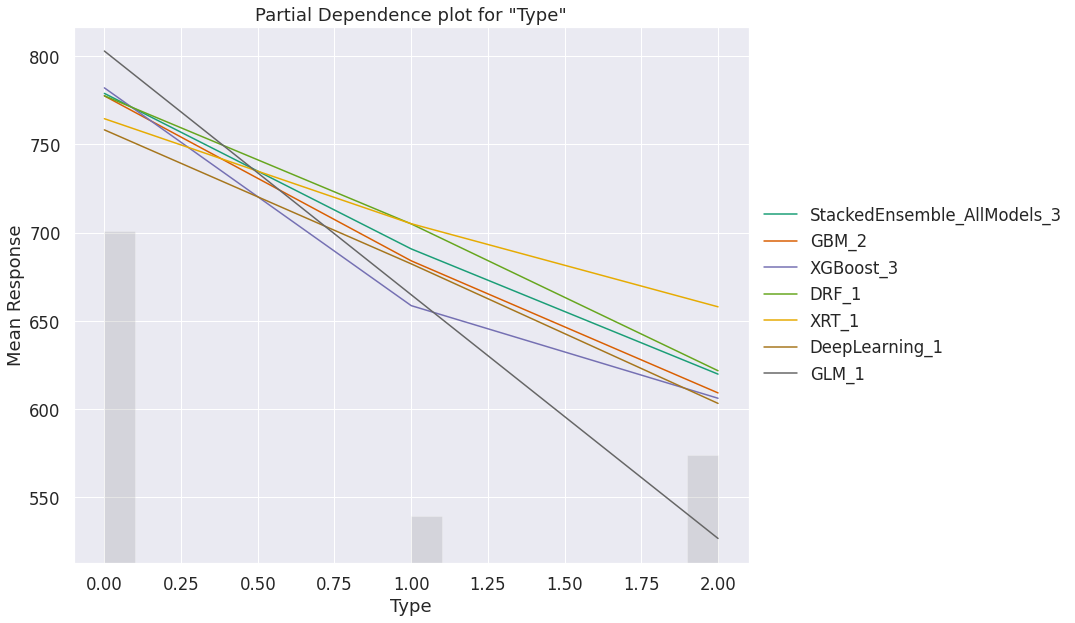

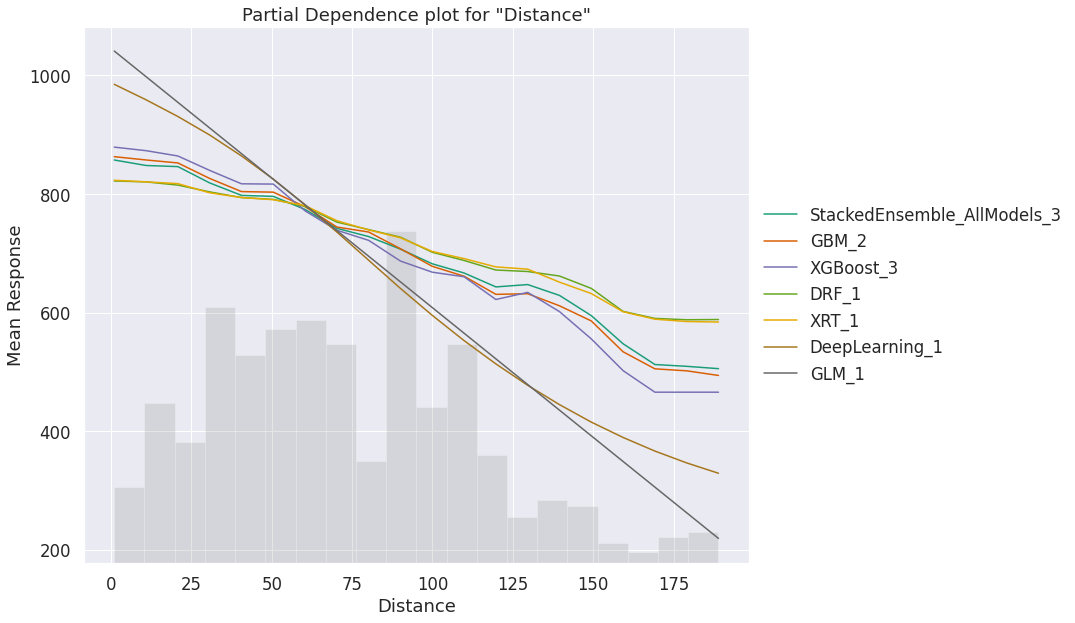

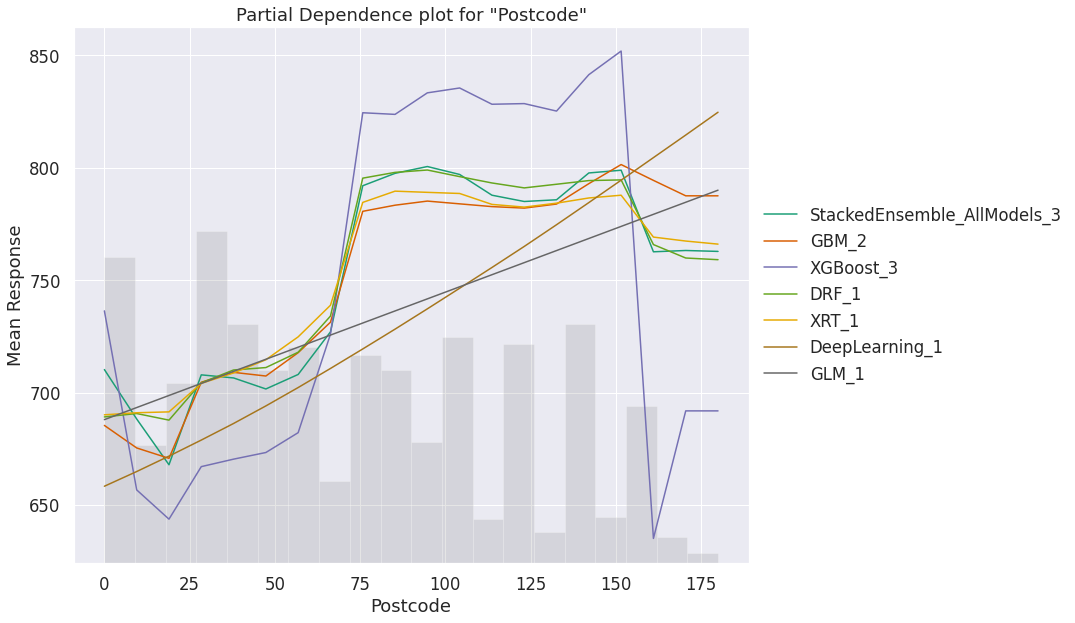

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

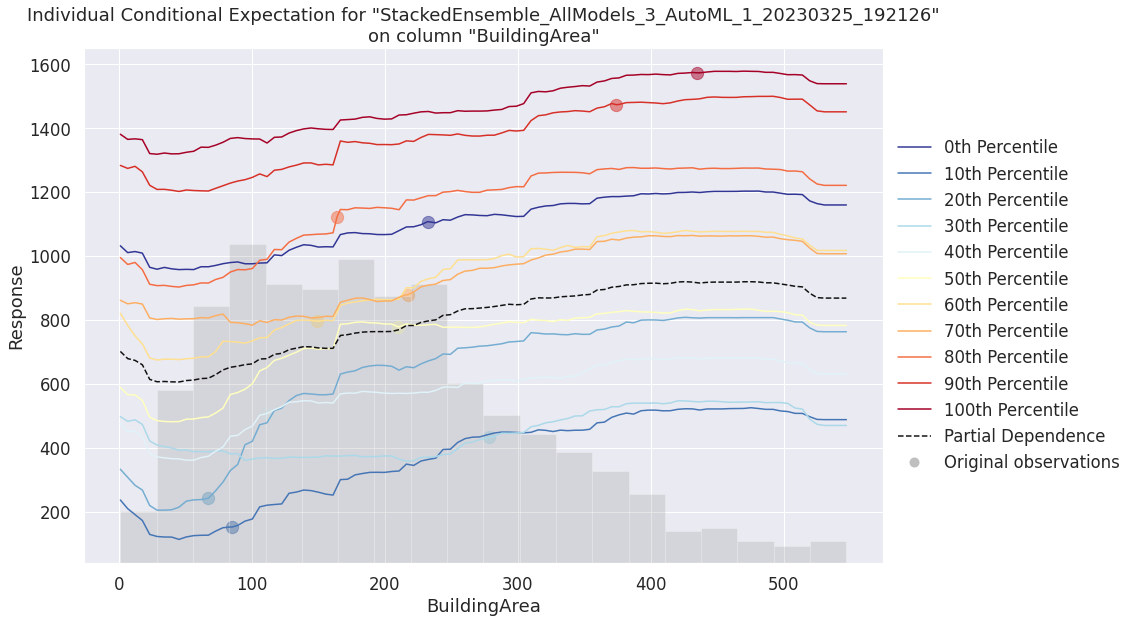

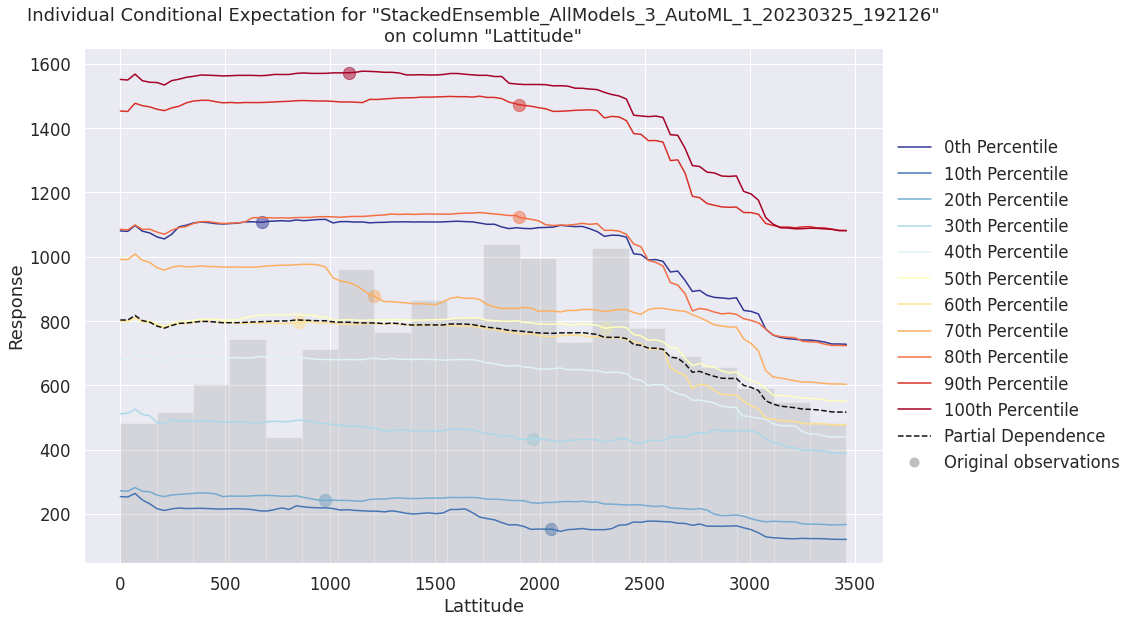

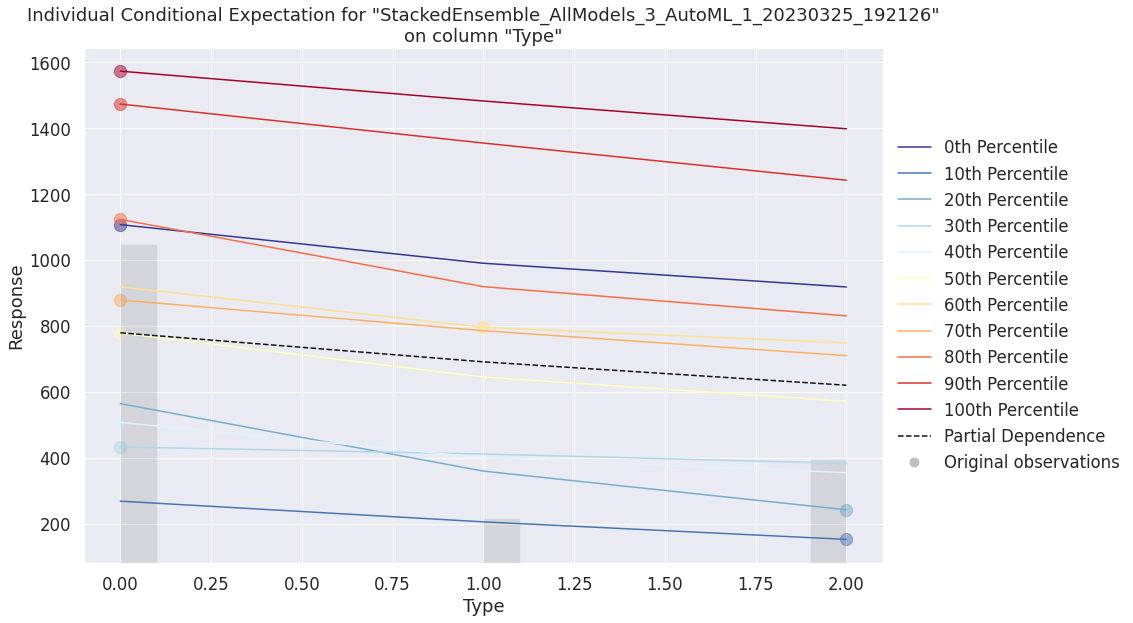

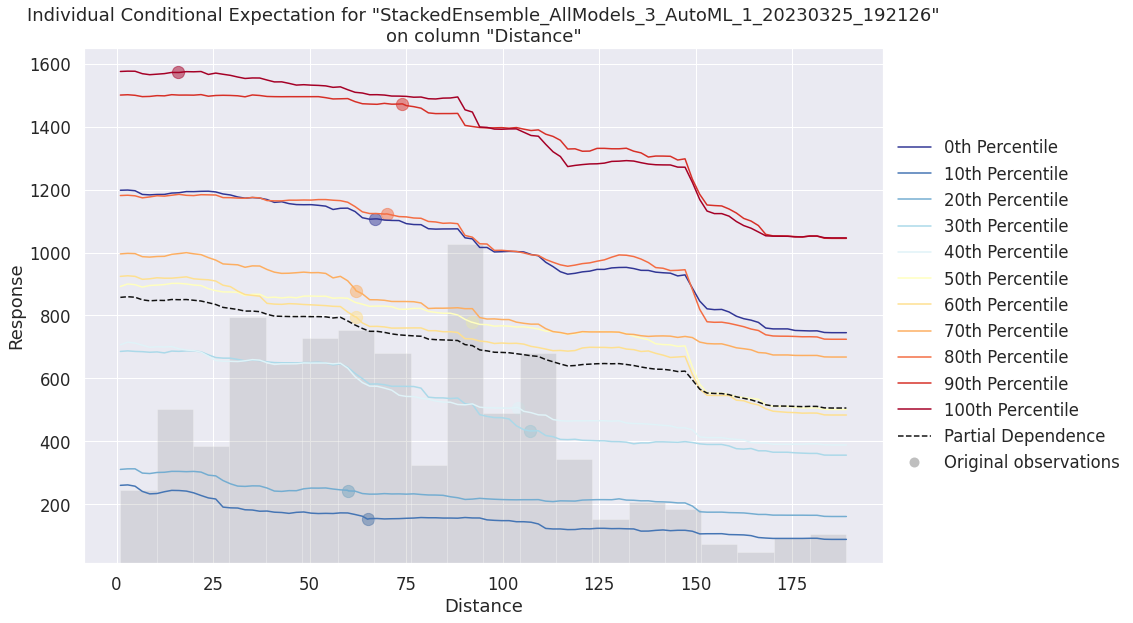

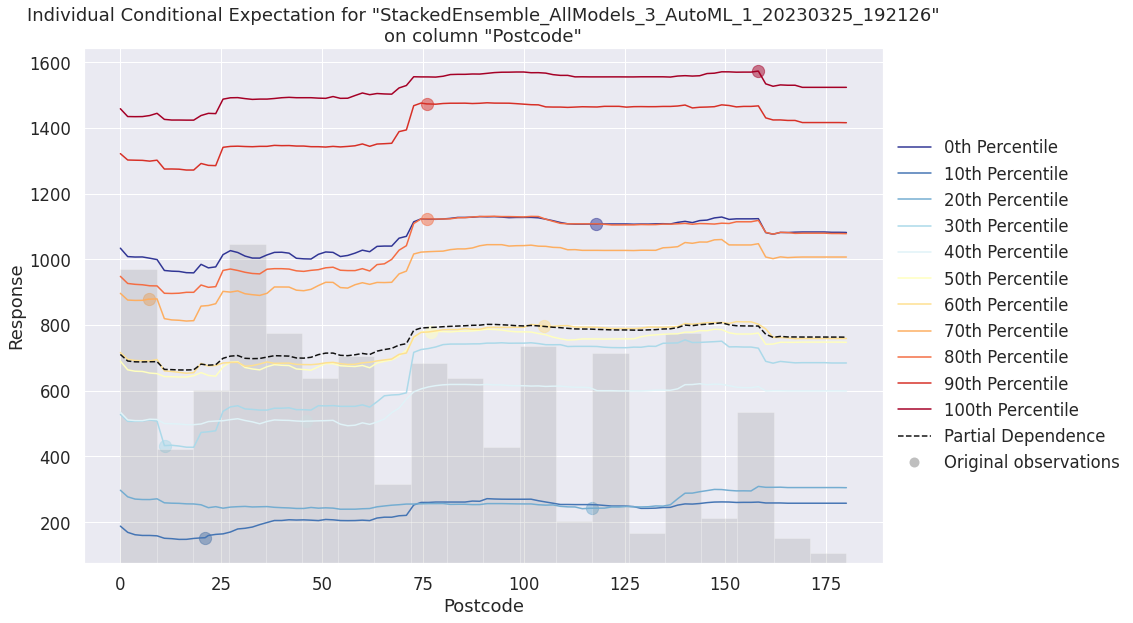

In [149]:
exa = aml.explain(df_test)

# Conclusion

For this dataset the best model according to AutoML is gbm. When a classifier like Random Forest was implemented on this dataset it gave a better accuracy. The accuracy on testing data was 88.09 percent. On the other hand when Linear Regression was implemented the accuracy for training data was 79.8 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

For each model, the important feature obtained were different. Among all these 3 models the best accuracy was obtained for random forest model.The important features for this model were BuildingArea, Latitude and YearBuilt. This means that for this model the target variable 'Price' is highly depended on BuildingArea, Latitude and YearBuilt.



# License

MIT License

Copyright (c) 2023 Viral Jangale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# References

OLS Model- http://net-informations.com/ds/mla/ols.html Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
Random Forest Model- https://towardsdatascience.com/understanding-random-forest-58381e0602d2 and https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
SHAP Analysis- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d and https://www.kaggle.com/code/dansbecker/shap-values/tutorial
Reference Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb